<a href="https://colab.research.google.com/github/PrzemyslawSarnacki/NumericalMethods/blob/master/Rational.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate
from numpy.polynomial.polynomial import Polynomial


In [2]:
x_arr = np.array([1, -2, 4], float)
y_arr = np.array([3, 5, 7], float)

W celu policzenia układu równań (w postaci powielonej macierzy wykorzystamy wcześniej zaimplementowaną przeze mnie metodę eliminacji Gaussa)

In [3]:
def elimination(x_arr, y_arr):
    """
    Gauss elimination method
    """
    # convert both matrices to numpy array format
    matrix = np.array(x_arr)
    b = np.array(y_arr)
    np.asarray(matrix)
    np.asarray(b)
    # check size of array
    n, m = matrix.shape

    # start the elimination phase
    # iter through rows
    for i in range(n - 1):
        for j in range(i + 1, n):
            if matrix[j, i] != 0.0:

                factor = matrix[i, i] / matrix[j, i]
                for k in range(i, n):
                    # subtract each value with use of factor
                    matrix[j, k] = matrix[i, k] - factor * matrix[j, k]
                # get new value of
                b[j] = b[i] - b[j] * factor

    # declare x - matrix with results
    x = np.zeros(n, float)
    # get first result
    x[n - 1] = b[n - 1] / matrix[n - 1, n - 1]
    # iter through rows
    for i in range(n - 2, -1, -1):
        sum_ = 0
        # iter through columns
        for j in range(i + 1, n):
            sum_ += matrix[i, j] * x[j]
        # get next results on each row
        x[i] = (b[i] - sum_) / matrix[i, i]
    return x


Implementacja wyłącznie na wartościach liczbowych (wynikiem jest tablica zawierająca wyniki w przedziale (od min zbioru do max) )

In [4]:
def polynomial(x_arr, y_arr):
    """
    polynomial interpolation method
    """
    n = len(x_arr)
    x_arr_ext = np.array(
        [x_arr ** i for i in range(n)],
        float,
    )
    y_result = np.array([], float)
    x_interval = np.linspace(x_arr.min(), x_arr.max())
    a = elimination(x_arr_ext, y_arr)
    for xp in x_interval:
        yp = 0
        for i, ai in enumerate(a):
            yp += ai * (xp ** i)
        y_result = np.append(y_result, yp)
    return y_result


Przetestujmy funkcję numeryczną

In [5]:
polynomial(x_arr, y_arr)

array([5.        , 4.80091628, 4.6118284 , 4.43273636, 4.26364015,
       4.10453978, 3.95543524, 3.81632653, 3.68721366, 3.56809663,
       3.45897543, 3.35985006, 3.27072053, 3.19158684, 3.12244898,
       3.06330696, 3.01416077, 2.97501041, 2.94585589, 2.92669721,
       2.91753436, 2.91836735, 2.92919617, 2.95002082, 2.98084132,
       3.02165764, 3.0724698 , 3.1332778 , 3.20408163, 3.2848813 ,
       3.3756768 , 3.47646814, 3.58725531, 3.70803832, 3.83881716,
       3.97959184, 4.13036235, 4.2911287 , 4.46189088, 4.6426489 ,
       4.83340275, 5.03415244, 5.24489796, 5.46563932, 5.69637651,
       5.93710954, 6.1878384 , 6.4485631 , 6.71928363, 7.        ])

Sprawdźmy czy obliczenia były poprawne przy pomocy funkcji z biblioteki SciPy

In [6]:
interval = np.linspace(x_arr.min(), x_arr.max())
poly = scipy.interpolate.BarycentricInterpolator(x_arr, y_arr)
poly(interval)

array([5.        , 4.80091628, 4.6118284 , 4.43273636, 4.26364015,
       4.10453978, 3.95543524, 3.81632653, 3.68721366, 3.56809663,
       3.45897543, 3.35985006, 3.27072053, 3.19158684, 3.12244898,
       3.06330696, 3.01416077, 2.97501041, 2.94585589, 2.92669721,
       2.91753436, 2.91836735, 2.92919617, 2.95002082, 2.98084132,
       3.02165764, 3.0724698 , 3.1332778 , 3.20408163, 3.2848813 ,
       3.3756768 , 3.47646814, 3.58725531, 3.70803832, 3.83881716,
       3.97959184, 4.13036235, 4.2911287 , 4.46189088, 4.6426489 ,
       4.83340275, 5.03415244, 5.24489796, 5.46563932, 5.69637651,
       5.93710954, 6.1878384 , 6.4485631 , 6.71928363, 7.        ])

Oraz z funkcją otrzymaną symbolicznie 

In [7]:
def func(x):
    return 3 - (1 / 3) * x + (1 / 3) * x ** 2


In [8]:
interval = np.linspace(x_arr.min(), x_arr.max())
func(interval)

array([5.        , 4.80091628, 4.6118284 , 4.43273636, 4.26364015,
       4.10453978, 3.95543524, 3.81632653, 3.68721366, 3.56809663,
       3.45897543, 3.35985006, 3.27072053, 3.19158684, 3.12244898,
       3.06330696, 3.01416077, 2.97501041, 2.94585589, 2.92669721,
       2.91753436, 2.91836735, 2.92919617, 2.95002082, 2.98084132,
       3.02165764, 3.0724698 , 3.1332778 , 3.20408163, 3.2848813 ,
       3.3756768 , 3.47646814, 3.58725531, 3.70803832, 3.83881716,
       3.97959184, 4.13036235, 4.2911287 , 4.46189088, 4.6426489 ,
       4.83340275, 5.03415244, 5.24489796, 5.46563932, 5.69637651,
       5.93710954, 6.1878384 , 6.4485631 , 6.71928363, 7.        ])

Porównanie powyższych działań na wykresie 

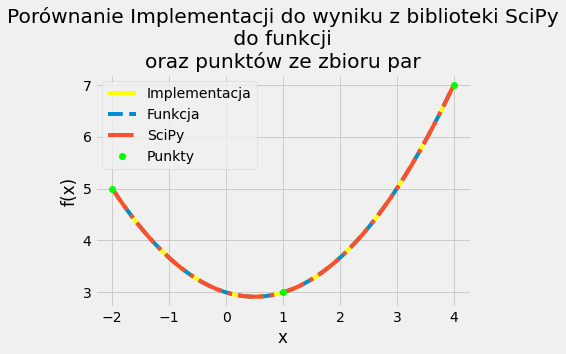

In [9]:
plt.style.use("fivethirtyeight")

plt.plot(interval, polynomial(x_arr, y_arr), color="yellow")
plt.plot(interval, func(interval), linestyle="dashed")
plt.plot(interval, poly(interval), linestyle="dashdot")
plt.plot(x_arr, y_arr, "o", color="lime")
plt.title(
    "Porównanie Implementacji do wyniku z biblioteki SciPy\n do funkcji \noraz punktów ze zbioru par"
)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend(["Implementacja", "Funkcja", "SciPy", "Punkty"])

Jak widzimy wyniki z funkcją oraz z implementacją wewnątrz biblioteki SciPy pokrywają się